# Принятие решений в бизнесе

## Описание проекта

Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Цель исследования:** Выявить по результатам А/В теста, верна ли гипотеза, выбранная для увеличения выручки.    

**Описание данных:**  

Данные для первой части:   
файл **/datasets/hypothesis.csv.** 
*Hypothesis* — краткое описание гипотезы;
*Reach* — охват пользователей по 10-балльной шкале;
*Impact* — влияние на пользователей по 10-балльной шкале;
*Confidence* — уверенность в гипотезе по 10-балльной шкале;
*Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Данные для второй части: файл **/datasets/orders.csv.** 
*transactionId* — идентификатор заказа;
*visitorId* — идентификатор пользователя, совершившего заказ;
*date* — дата, когда был совершён заказ;
*revenue* — выручка заказа;
*group* — группа A/B-теста, в которую попал заказ.   

файл **/datasets/visitors.csv.** 
*date* — дата;
*group* — группа A/B-теста;
*visitors* — количество пользователей в указанную дату в указанной группе A/B-теста 

## Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [3]:
# сетка на графики
sns.set_style('whitegrid')

In [4]:
# визуализация 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [5]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [7]:
hypothesis.columns = hypothesis.columns.str.lower()

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы  по ICE - 8, 0, 7.

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [9]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Наиболее перспективные гипотезы  по RICE - 7, 2, 0, 6. 

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Приоритезация гипотез по RICE ожидаемо изменилась по сревнению с ICE, ведь получая приоритет по RICE мы умножили резльтат ICE на параметр *reach* (оценивает, на какое количество пользователей повлияет изменение), который и вывел в лидеры 7ю (reach=10) гипотезу, а 8ю (reach=1) сместил на 5е место.  

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  

**Задача** Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. - Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

#### Подготовка данных к анализу

In [10]:
#функция для ознакомления с данными
def description(dframe):
    display('Первые 5 строк')
    display(dframe.head())
    display('Общая информация')
    dframe.info()
    display('Дубликаты')
    display(dframe.duplicated().sum())
    print('*'*50)
    
description(orders)

'Первые 5 строк'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Дубликаты'

0

**************************************************


In [11]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [12]:
def description(dframe):
    display('Первые 5 строк')
    display(dframe.head())
    display('Общая информация')
    dframe.info()
    display('Дубликаты')
    display(dframe.duplicated().sum())
    print('*'*50)
    
description(visitors)

'Первые 5 строк'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Дубликаты'

0

**************************************************


In [13]:
# меняю тип данных в столбцах date
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
display(orders.date.min())
orders.date.max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [15]:
display(visitors.date.min())
visitors.date.max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [16]:
#количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,503
B,586


In [17]:
#всего уникальных пользователей
orders['visitor_id'].nunique()

1031

In [18]:
#считаю тех, кто оказался одновременно в A и B:
doubled_id = (
    orders[['visitor_id', 'group']].groupby('visitor_id', as_index=False)
    .agg({'group':'nunique'})
    .query('group == 2')
    .drop(columns=['group'])
    )

doubled_id.count()

visitor_id    58
dtype: int64

Более 5ти процентов пользователей оказались одновременно в обоих группах трафика. Удаляю их из таблиц для корректного анализа.

In [19]:
#"задвоенных" ползователей удаляю из orders:
orders = orders[~orders['visitor_id'].isin(doubled_id['visitor_id'])]
len(orders)

1016

Удалить транзакции этих пользователей из таблицы visitors невозможно.

In [20]:
#проверим количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,445
B,528


In [21]:
#количество заказов в двух группах
orders.groupby('group').agg({'transaction_id' : 'nunique'})

,transaction_id
group,
A,468
B,548


**Выводы:** Тест проводился с 1.08.2019 по 31.08.2019. Уникальных пользователей 1031. Трафик разделен на группы некорректно - в обе группы сразу попали 58 пользователей (данные о заказах этих пользователей удалены из orders), а также неравномерно - в группе В после удаления попавших в обе группы пользователей стало 528, а в группе А - 445, т.е. на 83 пользователя больше. За данный период пользовтели обеих групп совершили 1016 заказов. Некорректное деление трафика теста повлияет на качество анализа.

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [22]:
# создадим датафрейм с уникальными парами значений дата-группа:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [23]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique', #число уникальных заказов в группе теста по указанную дату включительно
            'visitor_id': 'nunique', #число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
            'revenue': 'sum', #суммарная выручка заказов в группе теста по указанную дату включительно.
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), #количество уникальных посетителей в группе теста по указанную дату включительно
    axis=1,
).sort_values(by=['date', 'group'])

In [25]:
# чтобы построить графики, нужно собрать кумулятивные данные в один датафрейм
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

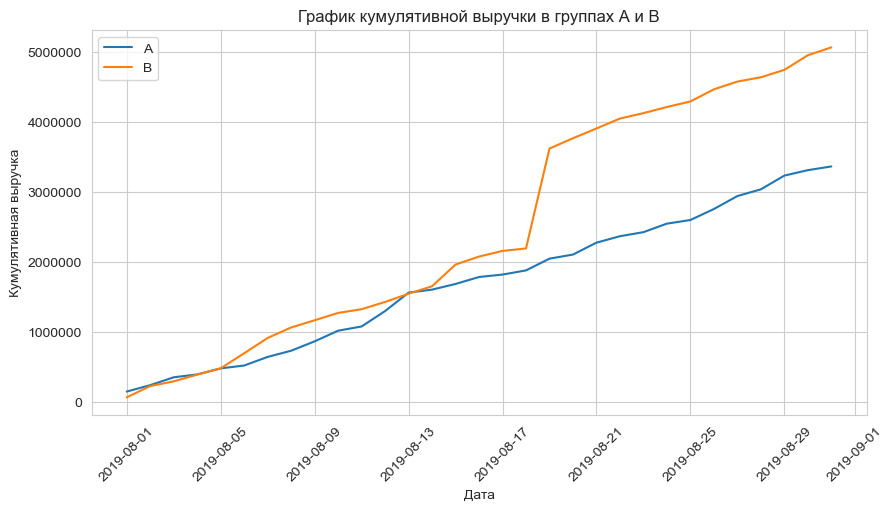

In [26]:
# построим графики кумулятивной выручки по дням и группам A/B-тестирования

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки в группах А и В')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.legend()
plt.xticks (rotation= 45)
plt.ticklabel_format(style='plain', axis='y') # форматирование меток
plt.show()

In [27]:
orders.sort_values(by='revenue', ascending=False).head(3)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A


**Вывод:** Значение кумулятивной выручки в группе В немного привышало значение в группе А до 18го авуста, а затем 19го числа был аномально дорогой заказ на 1,29млн, значение кумулятивной выручки в группе В резко выросло. 

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

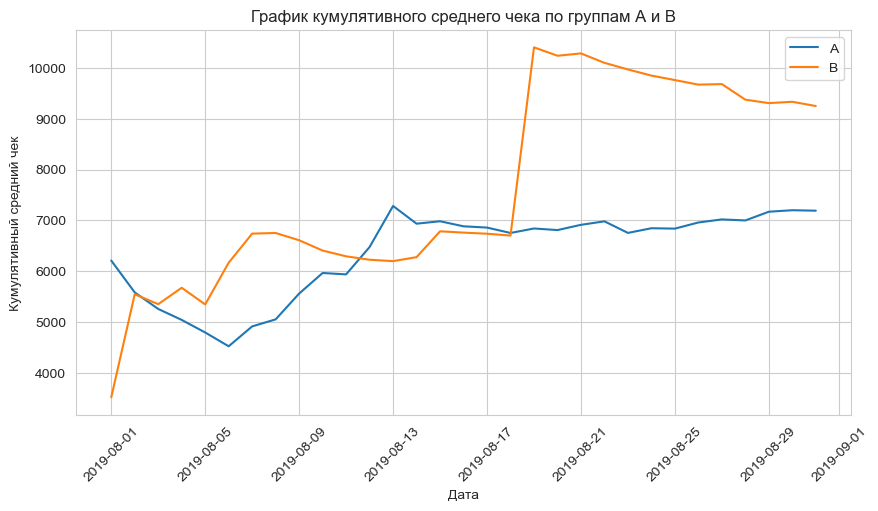

In [28]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.ylabel('Кумулятивный средний чек')
plt.xlabel('Дата')
plt.legend() 
plt.xticks (rotation= 45)
plt.show()

**Вывод:** Кумулятивный средний чек в группе В боьлшую часть времени был больше, чем в группе А. Колебания графиков кумулятивного среднего чека подтверждают наличие аномальных заказов.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

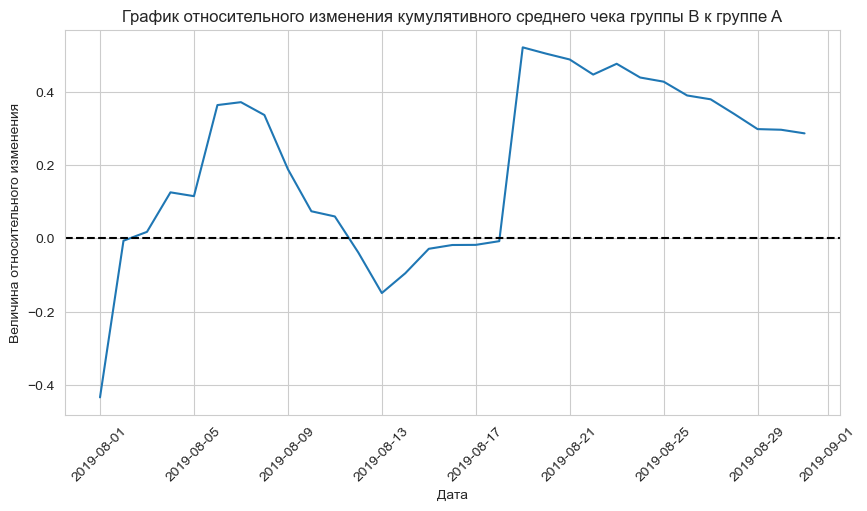

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.ylabel('Величина относительного изменения')
plt.xlabel('Дата')
plt.xticks (rotation= 45)
plt.show()

**Вывод:** Группа В большую часть времени лучше группы А по кумулятивному среднему чеку. Есть скачки в несколько дат - вероятно в эти дни были аномальные заказы.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

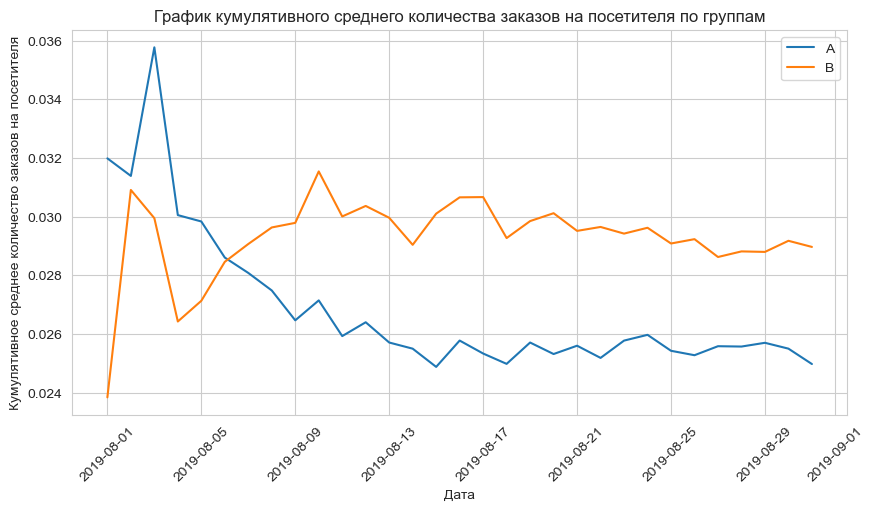

In [30]:
# считаем кумулятивную конверсию
cumulativeData['avgOrdersPerVisitor'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['avgOrdersPerVisitor'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avgOrdersPerVisitor'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам') 
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.xticks (rotation= 45)
plt.show()

**Вывод:** До 6го числа кумулятивное среднее количество заказов на посетителя было больше в группе А, а далее и до конца месяца - стабильно выше в группе В. В начале теста были колебания конверсии в обеих группах. График стабилизировался только к концу.

####  Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

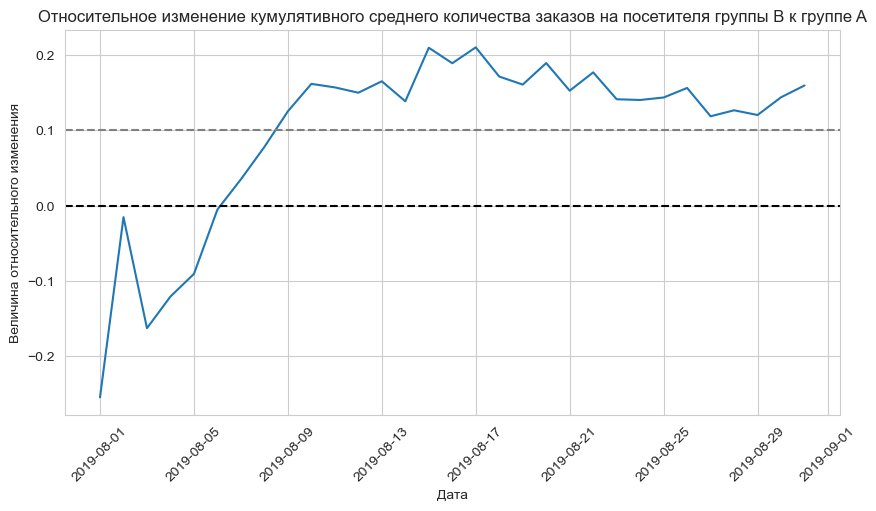

In [31]:
mergedCumAvgOrdPerVis = cumulativeDataA[['date','avgOrdersPerVisitor']].merge(cumulativeDataB[['date','avgOrdersPerVisitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumAvgOrdPerVis['date'], mergedCumAvgOrdPerVis['avgOrdersPerVisitorB']/mergedCumAvgOrdPerVis['avgOrdersPerVisitorA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A") 
plt.ylabel('Величина относительного изменения')
plt.xlabel('Дата')
plt.xticks (rotation= 45)
plt.show()

**Вывод:** Кумулятивное среднее количество заказов на посетителя в группе B стабильно лучше, чем в группе A на 10% начиная с 8го числа и до конца месяца.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

,visitor_id
orders,
1,937
2,29
3,7


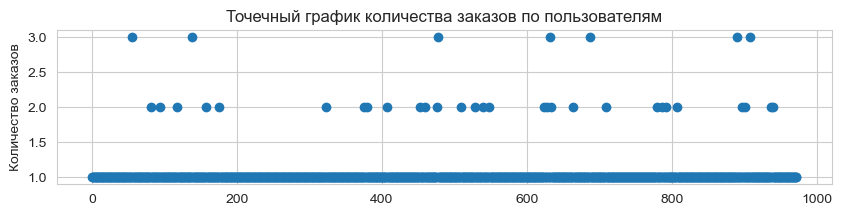

In [32]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

display(ordersByUsers.groupby('orders').agg({'visitor_id':'count'}))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(10,2))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:** В большинстве своем на одного пользователя прихдится один заказ. Есть и те, кто сделал 2 заказа и 3 но их значительно меньше.

####  Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Вывод:** Менее 1% пользователей совершают больше 2х заказов - таким образом 3 заказа на пользователя это уже аномалия.

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

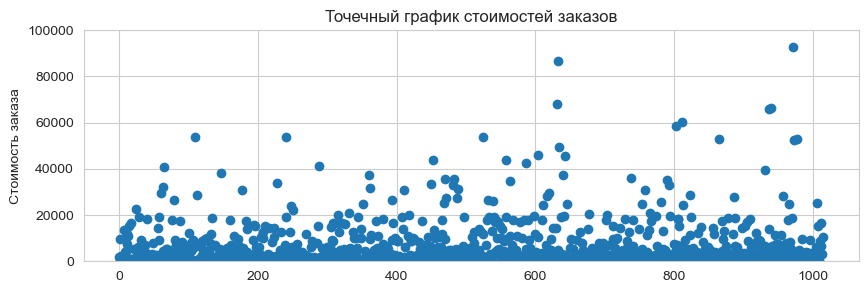

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A


In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,3))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim((0,100000))
plt.show()

orders.sort_values(by='revenue', ascending=False).head(3)

**Вывод:** Аномальные заказы на 1.29млн. и 202т. на графике не отображаем. Остальные -  меньше 92т. Чтобы опредеить границу аномалий лучше посчитать перцентили.  

####  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Вывод:** Не более 5% заказов выше 26.7тыс., и не более 1% выше 53.9тыс. Граница для определения аномальных заказов - 27тыс.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. - Сделайте выводы и предположения.

**Нулевая гипотеза:** статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. 
**Альтернативная гипотеза:** Статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.  
**Уровень статистической значимости** alpha = 0.05  
Для проверки гипотезы использую непараметрический тест Уилкоксона-Манна-Уитни:

In [36]:
#выделяем из visitors только группу А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#считаем кумулятивное количество пользователей в группе А по дням
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [37]:
#то же самое для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [38]:
#агрегируем число заказов и общую выручку с них по дням для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [39]:
#та же таблица по группе А, только кумулятивная
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [40]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [41]:
#собираем все таблицы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [42]:
#считаем заказы на каждого пользователя по группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [43]:
# в sampleA и sampleB  выборки, где каждый элемент — число заказов определённого пользователя, в том числе ноль.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
Относительный прирост = 0.160


**Вывод:** Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем. Относительный прирост среднего количества заказов на постителя группы В к группе А равен 16%.


####  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.   
**Альтернативная гипотеза:** Статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть.
**Уровень статистической значимости** alpha = 0.05  
Для проверки гипотезы использую непараметрический тест Уилкоксона-Манна-Уитни:

In [44]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Относительный прирост = 0.287


**Вывод:** P-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет (нулевую гипотезу не отвергаем). При этом, относительное различие среднего чека между сегментами - 28,7%.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.   
**Альтернативная гипотеза:** Статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.
**Уровень статистической значимости** alpha = 0.05  
Для проверки гипотезы использую непараметрический тест Уилкоксона-Манна-Уитни:

In [45]:
#Границы аномалий:
abnormalRevenue = np.percentile(orders['revenue'], [95]).min()
abnormalOrders = np.percentile(ordersByUsers['orders'], [99]).min()

In [46]:
# фильтруем данные на оновании, что аномальные пользователи сделали более 2х заказов и аномальные заказы - более 2700
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormalOrders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormalOrders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormalRevenue]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [47]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


p-value = 0.012
Относительный прирост = 0.182


**Вывод:** В предыдущих тестах определено, что аномальными пользоватеелями считаем тех кто сделал 3 и более заказов. Аномальные заказы  те, что превышают 27000. По "очищенным" данным, p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в реднем количестве заказов на посетителя между группами нет, - отвергаем. А относительный прирост показателя в группе "B" по сравненю с "A" равен 18.2%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** Cтатистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет.   
**Альтернативная гипотеза:** Статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.
**Уровень статистической значимости** alpha = 0.05  
Для проверки гипотезы использую непараметрический тест Уилкоксона-Манна-Уитни:

In [48]:
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.646
Относительный прирост = -0.048


**Выводы:** Уровень статистической значимости p-value=0.64 больше 0.05, а значит нулевую гипотезу не отвергаем и статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. Относительное изменение среднего чека в группе "В" по сравненю с "А" отрицательное - средний чек в группе оказался В ниже, чем в А на 4%.

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Вывод:**  
  
  По графикам:  
- кумулятивной выручки - лидирует группа В;
- кумулятивного среднего чека - лидирует группа В;
- кумулятивного среднего количества заказов на посетителя по группам - лидирует В;   

По гипотезам:  
- **есть** статистически значимые различия в среднем количестве заказов на посетителя по "сырым" данным (прирост в группе В - 16%);  
- **нет** статистически значимых различий в среднем чеке по "сырым" данным (при этом относительный прирост в группе В по сравнению с А 28% из-за заказа на 1.2млн);
- **есть** статистически значимые различия в среднем количестве заказов на посетителя по "очищенным" данным (прирост в группе В - 18%); 
- **нет** статистически значимых различий в среднем чеке по "очищенным" данным (относительный прирост в группе В по сравнению с А 4%);  

Таким образом, при стабильном среднем чеке, количество заказов на посетителя в группе В улучшилось на 18% и можно останавливать тест, заиксировав лидерство группы В.